In [278]:
import numpy as np
import sympy
import sympy.abc
import sympy.plotting
import mpmath
import matplotlib.pyplot as plt
sympy.init_printing()

In [2]:
x = sympy.abc.x
y = sympy.abc.y

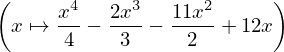

In [457]:
#G = sympy.Lambda(x, (x+1)**5-8*(x+1)**3+10*(x+1)+6 + sympy.exp(x**2))
#G = sympy.Lambda(x, (sympy.sin(x) - sympy.sin(3*x) + sympy.sin(5*x)) + sympy.exp(x**2/10))
#G = sympy.Lambda(x, (sympy.sin(x) - sympy.cos(3*x) + sympy.tan(5*x)) + sympy.exp(x**2/10))
#G = sympy.Lambda(x, (sympy.sin(x)).integrate(x))
#G = sympy.Lambda(x, (2.5*x*(1-x)).integrate(x))
G = sympy.Lambda(x, (x**3-2*x**2-11*x+12).integrate(x))
G

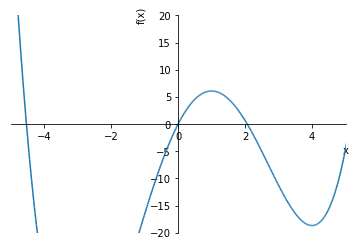

In [458]:
sympy.plot(G(x), xlim=(-5,5), ylim=(-20,20), adaptive=False, nb_of_points=1000)

In [459]:
F = sympy.Lambda(x, G(x).diff(x).simplify())
F

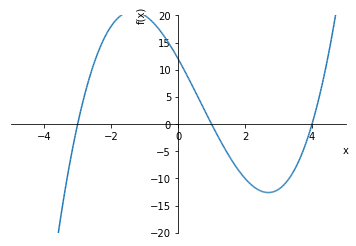

In [460]:
sympy.plot(F(x), xlim=(-5,5), ylim=(-20,20), adaptive=False, nb_of_points=1000)

In [465]:
Froots = sympy.solve(F(x), seq=True)
Ffixedpoints = sympy.solve(sympy.Eq(F(x), x), seq=True)
print('roots', [r.evalf() for r in Froots])
print('fixedpoints', [r.evalf() for r in Ffixedpoints])
print('hyperbolicity', [abs((F(x)+x).diff(x).evalf(subs={x:r})) for r in Ffixedpoints])

roots [-3.00000000000000, 1.00000000000000, 4.00000000000000]
fixedpoints [0.923492733622878 + 0.e-22*I, 4.18295713441225 - 0.e-22*I, -3.10644986803512 + 0.e-20*I]
hyperbolicity [11.1354544473287, 25.7595626273419, 31.3758918199868]


In [464]:
lambda_F = sympy.lambdify(x, F(x), 'numpy')
rK = (-3,7)
nK = abs(rK[1]-rK[0])
nA = 20 
S = np.array([1,-1]).repeat(nK*nA)
K = np.power(10.,np.tile(np.arange(*rK).repeat(nA), 2))
a = np.tile(np.linspace(-5,5,nA), nK*2)
for _ in range(1000):
    a = a + S*lambda_F(a)/K
result = set(a[np.abs(lambda_F(a)) < 1e-13])
result

/home/marco/.virtualenvs/ml/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in power
  """
/home/marco/.virtualenvs/ml/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in square
  """
/home/marco/.virtualenvs/ml/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in subtract
  """
/home/marco/.virtualenvs/ml/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in multiply
  """
/home/marco/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


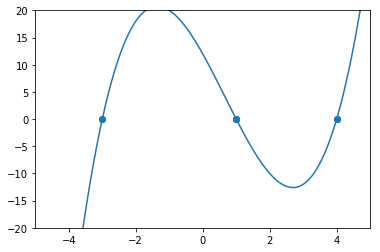

In [466]:
plot_x = np.linspace(-5,5,1000)
plot_y = lambda_F(plot_x)
plt.xlim((-5,5))
plt.ylim((-20,20))
plt.plot(plot_x, plot_y)
plt.scatter(list(result), [lambda_F(r) for r in result])
plt.show()

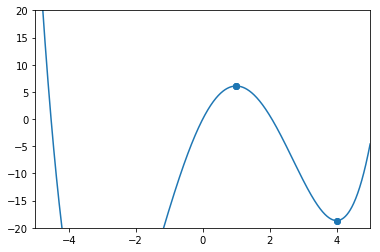

In [467]:
lambda_G = sympy.lambdify(x, G(x))
plot_x = np.linspace(-5,5,1000)
plot_y = lambda_G(plot_x)
plt.xlim((-5,5))
plt.ylim((-20,20))
plt.plot(plot_x, plot_y)
plt.scatter(list(result), [lambda_G(r) for r in result])
plt.show()

In [468]:
[(F(x)/F(x).diff(x)).diff(x).evalf(subs={x:r}) for r in result]

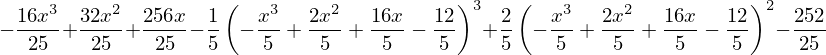

In [539]:
periodic2 = x
for _ in range(2):
    periodic2 = periodic2 - F(periodic2)/5
periodic2

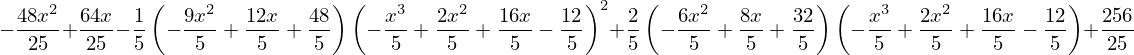

In [540]:
dperiodic2 = periodic2.diff(x)
dperiodic2

In [541]:
periodic2_roots = [s.evalf() for s in sympy.solve(sympy.Eq(periodic2, x), seq=True)]
periodic2_roots

In [542]:
[abs(dperiodic2.evalf(subs={x:s.evalf()})) for s in periodic2_roots]

In [543]:
a = -1.9
for _ in range(50):
    a = a + lambda_F(a) / 5
    print(a)

1.8642000000000003
0.06857243705759997
2.315896691857676
-0.040221389141188
2.4476055491995856
-0.0008260180417893892
2.4009909486151053
-0.018866019812382007
2.422495510109386
-0.011112941947693411
2.4132858568616764
-0.01455190851429844
2.4173769707038657
-0.013046250941299409
2.4155869751575594
-0.013709347017763385
2.416375522619131
-0.013418062104649131
2.4160291735999584
-0.013546162198624145
2.4161814980941076
-0.013489854729045625
2.4161145442361622
-0.01351461053902181
2.4161439810932253
-0.013503727587010683
2.416131040358191
-0.013508512064993372
2.416136729512327
-0.013506408701294603
2.4161342284350265
-0.013507333394612964
2.41613532797402
-0.013506926876863723
2.4161348445899313
-0.013507105592267532
2.416135057097723
-0.013507027024545426
2.4161349636740326
-0.013507061564873801
2.4161350047454158
-0.01350704638008704
2.4161349866894146
-0.013507053055696883
2.416134994627282
-0.013507050120932451
2.4161349911375978
-0.01350705141112929
2.4161349926717515
-0.01350705084

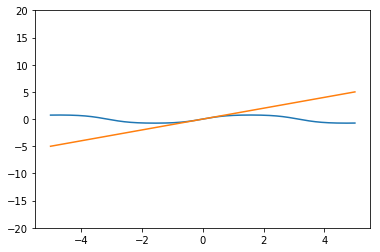

In [327]:
lambda_periodic3 = sympy.lambdify(x, periodic3)
periodic3_x = np.linspace(-5,5,1000)
periodic3_y = np.array([lambda_periodic3(x) for x in periodic3_x])
plt.ylim((-5,5))
plt.ylim((-20,20))
plt.plot(periodic3_x, periodic3_y)
plt.plot([-5,5],[-5,5])
plt.show()

In [328]:
CG = sympy.Lambda((x,y), G(x+y*sympy.I))
CG

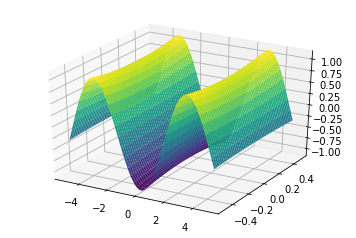

In [330]:
sympy.plotting.plot3d(CG(x,y), (x,-5,5), (y,-0.5,0.5))

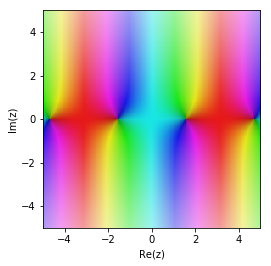

In [331]:
mpmath.cplot(sympy.lambdify(x, G(x), 'mpmath'), points=256*256)